# Customer Service Requests Analysis

DATASET : 311_Service_Requests_from_2010_to_Present


Solutions


1. Import a 311 NYC service request.

In [8]:
# importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
import seaborn as sns
import datetime

In [9]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [5]:
# reading the dataset (datacsra-Custemer_Service_Requests_Analysis)
datacsra= pd.read_csv('C:\\SimpliLearn\\2. Data science with Python\\Customer Service Requests Analysis\\311_Service_Requests_from_2010_to_Present.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (48,49) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [11]:
# View the top 5 elements of the dataset
datacsra.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [15]:
# size of the dataset
datacsra.size

15936994

In [14]:
# shape of the dataset
datacsra.shape

(300698, 53)

In [16]:
# information of the dataset
datacsra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

In [17]:
# columns names
datacsra.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

Columns having null values are dropped/ Dropping of unnecesary column

In [18]:
# Columns names to be dropped

drop_columns=['Agency Name','Incident Address','Street Name','Cross Street 1','Cross Street 2','Intersection Street 1',
'Intersection Street 2','Address Type','Park Facility Name','Park Borough','School Name',
'School Number','School Region','School Code','School Phone Number','School Address','School City',
'School State','School Zip','School Not Found','School or Citywide Complaint','Vehicle Type',
'Taxi Company Borough','Taxi Pick Up Location','Bridge Highway Name','Bridge Highway Direction',
'Road Ramp','Bridge Highway Segment','Garage Lot Name','Ferry Direction','Ferry Terminal Name','Landmark',
'X Coordinate (State Plane)','Y Coordinate (State Plane)','Due Date','Resolution Action Updated Date','Community Board','Facility Type',
'Location']

In [19]:
# Columns having null values are dropped

datacsra = datacsra.drop(drop_columns, axis=1)

In [20]:
# size of the dataset after dropping column
datacsra.size

4209772

In [21]:
#shape of the dataset after dropping column
datacsra.shape

(300698, 14)

    Columns are reduced from 53 to 14

In [22]:
# information of dataset after dropping column
datacsra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Unique Key              300698 non-null  int64  
 1   Created Date            300698 non-null  object 
 2   Closed Date             298534 non-null  object 
 3   Agency                  300698 non-null  object 
 4   Complaint Type          300698 non-null  object 
 5   Descriptor              294784 non-null  object 
 6   Location Type           300567 non-null  object 
 7   Incident Zip            298083 non-null  float64
 8   City                    298084 non-null  object 
 9   Status                  300698 non-null  object 
 10  Resolution Description  300698 non-null  object 
 11  Borough                 300698 non-null  object 
 12  Latitude                297158 non-null  float64
 13  Longitude               297158 non-null  float64
dtypes: float64(3), int64

In [23]:
# checking the number of null 

datacsra.isnull().sum()

Unique Key                   0
Created Date                 0
Closed Date               2164
Agency                       0
Complaint Type               0
Descriptor                5914
Location Type              131
Incident Zip              2615
City                      2614
Status                       0
Resolution Description       0
Borough                      0
Latitude                  3540
Longitude                 3540
dtype: int64

In [24]:
# choosing the closed cases only to eliminate the null values

datacsra= datacsra[datacsra['Status'] == 'Closed']

In [25]:
datacsra.isnull().sum()

Unique Key                   0
Created Date                 0
Closed Date                  0
Agency                       0
Complaint Type               0
Descriptor                5903
Location Type               65
Incident Zip               507
City                       506
Status                       0
Resolution Description       0
Borough                      0
Latitude                  1432
Longitude                 1432
dtype: int64

In [27]:
# all the cases are of closed cases 
#drop the column Status as every value of its data are same
datacsra = datacsra.drop(['Status'], axis = 1)

In [28]:
# shape of the dataset after droping
datacsra.shape

(298471, 13)

In [29]:
# Descriptor, Latitude and Longitude has over 1000 plus null values

datacsra = datacsra[(datacsra['Descriptor'].notnull()) & (datacsra['Latitude'].notnull()) &(datacsra['Longitude'].notnull())]

In [31]:
# check remaining null values in dataset
datacsra.isnull().sum()

Unique Key                 0
Created Date               0
Closed Date                0
Agency                     0
Complaint Type             0
Descriptor                 0
Location Type             55
Incident Zip              40
City                      40
Resolution Description     0
Borough                    0
Latitude                   0
Longitude                  0
dtype: int64

In [32]:
# few null values in our dataset. we will remove them

datacsra = datacsra[(datacsra['Location Type'].notnull()) & (datacsra['Incident Zip'].notnull()) &(datacsra['City'].notnull())]

In [33]:
# check remaining null values in dataset
datacsra.isnull().sum()

Unique Key                0
Created Date              0
Closed Date               0
Agency                    0
Complaint Type            0
Descriptor                0
Location Type             0
Incident Zip              0
City                      0
Resolution Description    0
Borough                   0
Latitude                  0
Longitude                 0
dtype: int64

In [34]:
datacsra.shape

(291107, 13)

2. Read or convert the columns ‘Created Date’ and Closed Date’ to datetime datatype and create a new column ‘Request_Closing_Time’ as the time elapsed between request creation and request closing. 
(Hint: Explore the package/module datetime)

In [36]:
# converting 'Created Date' and 'Closed Date' to datetime datatype

cols = ['Created Date', 'Closed Date']
for col in cols:
    datacsra[col] = pd.to_datetime(datacsra[col],infer_datetime_format=True)

In [37]:
# creating a new column Request_Closing_Time lapsed between request creation and request closing

datacsra['Request_Closing_Time'] = datacsra[cols[1]] - datacsra[cols[0]]

In [39]:
datacsra.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 291107 entries, 0 to 300697
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype          
---  ------                  --------------   -----          
 0   Unique Key              291107 non-null  int64          
 1   Created Date            291107 non-null  datetime64[ns] 
 2   Closed Date             291107 non-null  datetime64[ns] 
 3   Agency                  291107 non-null  object         
 4   Complaint Type          291107 non-null  object         
 5   Descriptor              291107 non-null  object         
 6   Location Type           291107 non-null  object         
 7   Incident Zip            291107 non-null  float64        
 8   City                    291107 non-null  object         
 9   Resolution Description  291107 non-null  object         
 10  Borough                 291107 non-null  object         
 11  Latitude                291107 non-null  float64        
 12  Longitude       

3  Provide major insights/patterns that you can offer in a visual format (graphs or tables); at least 4 major conclusions that you can come up with after generic data mining

In [40]:
# shape of the dataset
datacsra.shape

(291107, 14)

In [41]:
# applying describe on the dataset
datacsra.describe()

,Unique Key,Incident Zip,Latitude,Longitude,Request_Closing_Time
count,2.911070e+05,291107.000000,291107.000000,291107.000000,291107
mean,3.130158e+07,10857.977349,40.725681,-73.925035,0 days 04:18:32.132665995
std,5.753777e+05,580.280774,0.082411,0.078654,0 days 06:03:45.509089128
min,3.027948e+07,83.000000,40.499135,-74.254937,0 days 00:01:00
25%,3.079934e+07,10314.000000,40.668926,-73.970957,0 days 01:16:30
50%,3.130675e+07,11209.000000,40.717782,-73.930774,0 days 02:42:38
75%,3.179091e+07,11238.000000,40.782973,-73.875788,0 days 05:20:24
max,3.231065e+07,11697.000000,40.912869,-73.700760,24 days 16:52:22


In [42]:
# columns names
datacsra.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Complaint Type',
       'Descriptor', 'Location Type', 'Incident Zip', 'City',
       'Resolution Description', 'Borough', 'Latitude', 'Longitude',
       'Request_Closing_Time'],
      dtype='object')

# 4 major conclusions


In [43]:
# All the complaints are under the same agency

datacsra['Agency'].value_counts()

NYPD    291107
Name: Agency, dtype: int64

In [44]:
# complaint types

datacsra['Complaint Type'].value_counts()

Blocked Driveway            76676
Illegal Parking             74021
Noise - Street/Sidewalk     47747
Noise - Commercial          35144
Derelict Vehicle            17506
Noise - Vehicle             16868
Animal Abuse                 7744
Traffic                      4466
Noise - Park                 3927
Vending                      3773
Drinking                     1270
Noise - House of Worship      920
Posting Advertisement         647
Disorderly Youth              285
Graffiti                      113
Name: Complaint Type, dtype: int64

<AxesSubplot:title={'center':'Complaint Types'}, ylabel='Count'>

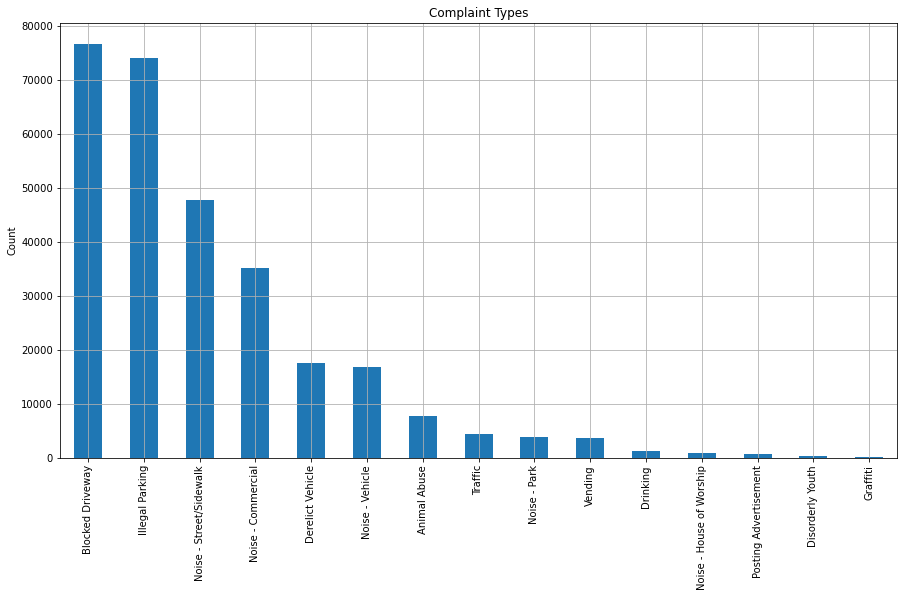

In [45]:
# plotting the complaint types

datacsra['Complaint Type'].value_counts().plot(kind = 'bar', figsize=(15, 8), title='Complaint Types', ylabel='Count', grid=True)

Maximum Complaint type are Blocked Driveway
followed by Illegal Parking, Noise-Street/Sidewalk, Noise-Commercial

In [46]:
# Descriptors

datacsra['Descriptor'].value_counts()

Loud Music/Party                  60444
No Access                         56725
Posted Parking Sign Violation     22103
Loud Talking                      21254
Partial Access                    19951
With License Plate                17506
Blocked Hydrant                   15837
Commercial Overnight Parking      11908
Car/Truck Music                   11114
Blocked Sidewalk                  10930
Double Parked Blocking Traffic     5558
Double Parked Blocking Vehicle     4147
Engine Idling                      4134
Banging/Pounding                   4090
Neglected                          3771
Car/Truck Horn                     3477
Congestion/Gridlock                2736
In Prohibited Area                 2017
Other (complaint details)          1961
Unlicensed                         1756
Overnight Commercial Storage       1746
Unauthorized Bus Layover           1333
Truck Route Violation              1010
In Public                           923
Tortured                            849


<AxesSubplot:title={'center':'Top 12 Descriptors'}>

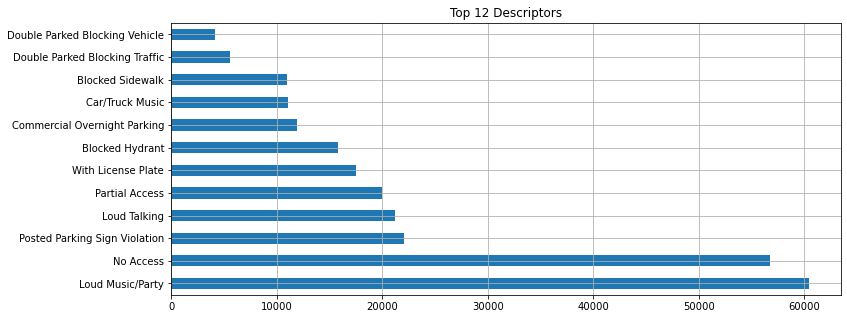

In [48]:
# plotting top 12 Descriptors

datacsra['Descriptor'].value_counts().head(12).plot(kind='barh', grid=True, figsize=(12,5), title='Top 12 Descriptors')

maximum complaints for descriptor are from Loud Music/Party 
followed by No Access, Posted Parking Sign Violation, Loud Taking,Partial Access.

In [53]:
# Top 6 Location Type

datacsra['Location Type'].value_counts().head(6)

Street/Sidewalk               242765
Store/Commercial               19425
Club/Bar/Restaurant            17172
Residential Building/House      5753
Park/Playground                 4246
House of Worship                 920
Name: Location Type, dtype: int64

<AxesSubplot:title={'center':'Top 6 Location Type'}>

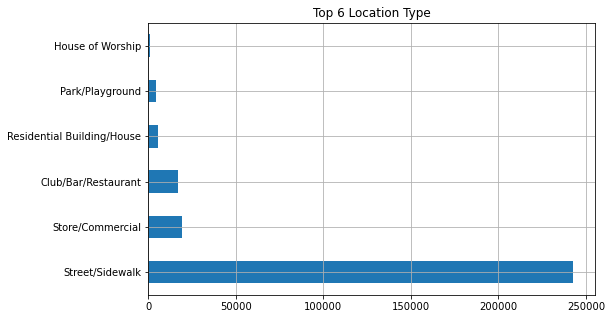

In [57]:
# plotting Top 6 Location Type

datacsra['Location Type'].value_counts().head(6).plot(kind='barh', grid=True, figsize=(8, 5), title='Top 6 Location Type')

Street/Sidewalk is a lot more than any other members of its category

In [59]:
# City

datacsra['City'].value_counts().head(12)

BROOKLYN               96858
NEW YORK               61935
BRONX                  40216
STATEN ISLAND          12211
JAMAICA                 7155
ASTORIA                 6254
FLUSHING                5916
RIDGEWOOD               5124
CORONA                  4265
WOODSIDE                3493
SOUTH RICHMOND HILL     2759
OZONE PARK              2733
Name: City, dtype: int64

Text(0.5, 0, 'Complaint Counts')

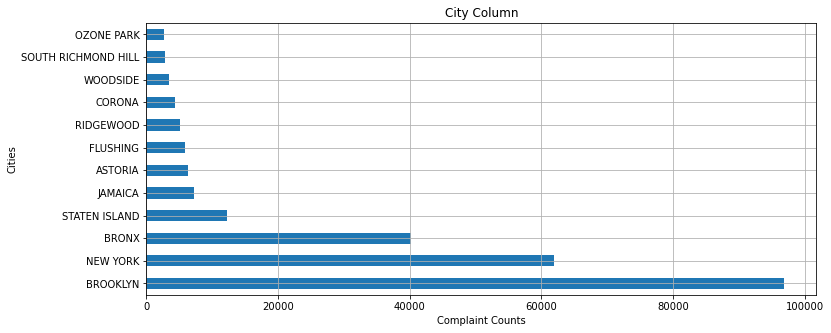

In [60]:
# plotting the cities

datacsra['City'].value_counts().head(12).plot(kind='barh', grid=True, figsize=(12, 5), title='City Column', ylabel='Cities')
plt.xlabel('Complaint Counts')

maximum complaints are from BROOKLYN followed New York, Bronx, Staten Island in City wise

Text(0.5, 0, 'Complaint Counts')

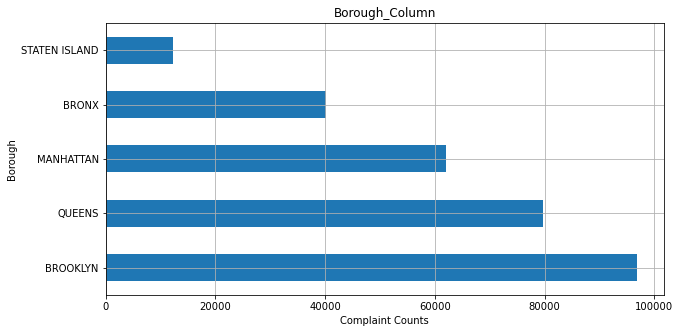

In [66]:
# Borough
datacsra['Borough'].value_counts().head(5).plot(kind='barh', grid=True, figsize=(10, 5), title='Borough_Column', ylabel='Borough')
plt.xlabel('Complaint Counts')

Maximum complaints are from BROOKLYN followed Queens, Manhattan, Bronx and Staten Island in Borough wise

Analyse Borough and Complaint Types

Borough per Complaint Type

In [73]:
# Top Complaints

top_5_complaints = datacsra['Complaint Type'].value_counts()[:5].keys()
top_5_complaints

Index(['Blocked Driveway', 'Illegal Parking', 'Noise - Street/Sidewalk',
       'Noise - Commercial', 'Derelict Vehicle'],
      dtype='object')

In [74]:
# Borough per Complaints

borough_complaints = datacsra.groupby(['Borough', 'Complaint Type']).size().unstack()
borough_complaints = borough_complaints[top_5_complaints]
borough_complaints

Complaint Type,Blocked Driveway,Illegal Parking,Noise - Street/Sidewalk,Noise - Commercial,Derelict Vehicle
Borough,,,,,
BRONX,12740,7829,8864,2431,1948
BROOKLYN,28119,27386,13315,11451,5164
MANHATTAN,2055,11981,20362,14528,530
QUEENS,31621,21944,4391,6057,8102
STATEN ISLAND,2141,4881,815,677,1762


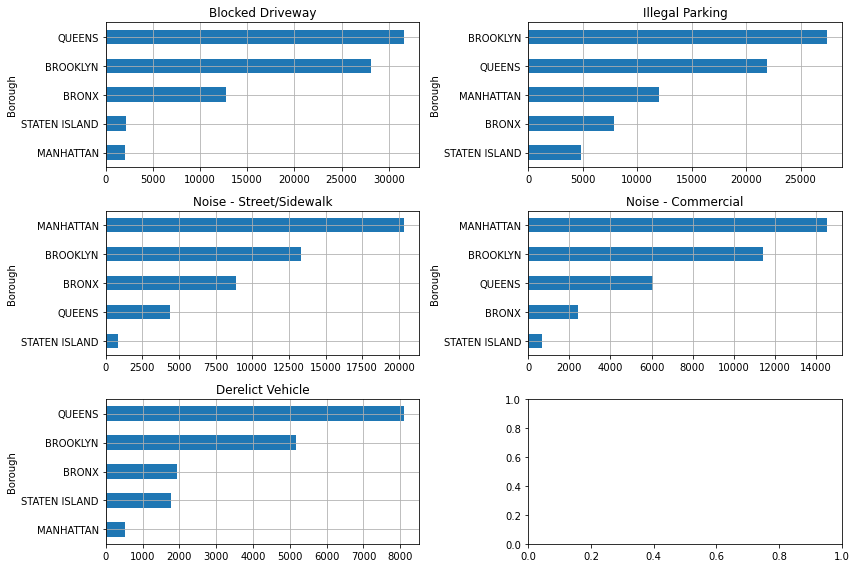

In [75]:
# Plotting Borough per Complaint Type 

col_number = 2
row_number = 3
fig, axes = plt.subplots(row_number,col_number, figsize=(12,8))

for i, (label,col) in enumerate(borough_complaints.iteritems()):
    ax = axes[int(i/col_number), i%col_number]
    col = col.sort_values(ascending=True)[:15]
    col.plot(kind='barh', ax=ax, grid=True)
    ax.set_title(label)
    
plt.tight_layout()

- Blocked Driveway is maximum in QUEENS
- Illegal Parking is maximum in BROOKLYN
- Noise - Street/Sidewalk is maximum in MANHATTAN
- Noise - Commercial is maximum in MANHATTAN
- Derelict Vehicle is maximum in QUEENS

#Complaints per Borough

In [76]:
# similarly for Complaints per Borough
top_borough = datacsra['Borough'].value_counts().keys()

complaint_per_borough = datacsra.groupby(['Complaint Type', 'Borough']).size().unstack()
complaint_per_borough = complaint_per_borough[top_borough]
complaint_per_borough

Borough,BROOKLYN,QUEENS,MANHATTAN,BRONX,STATEN ISLAND
Complaint Type,,,,,
Animal Abuse,2390,1874,1511,1412,557
Blocked Driveway,28119,31621,2055,12740,2141
Derelict Vehicle,5164,8102,530,1948,1762
Disorderly Youth,72,59,68,63,23
Drinking,257,357,294,187,175
Graffiti,43,37,22,9,2
Illegal Parking,27386,21944,11981,7829,4881
Noise - Commercial,11451,6057,14528,2431,677
Noise - House of Worship,338,297,189,79,17


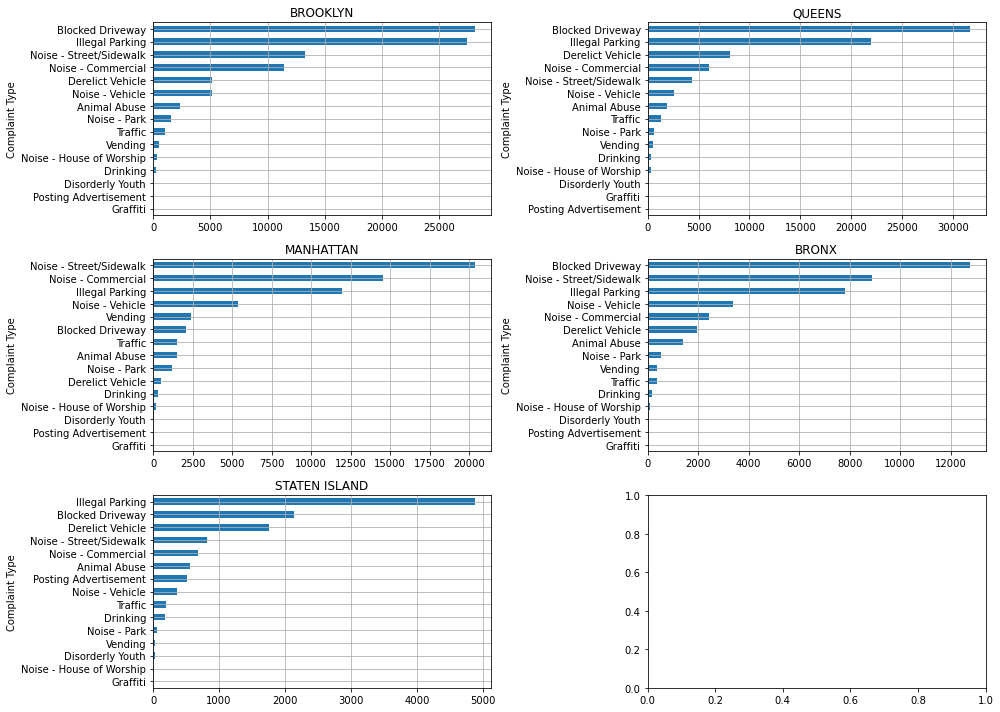

In [82]:
# Plotting Complaints per Borough
col_number = 2
row_number = 3
fig, axes = plt.subplots(row_number,col_number, figsize=(14,10))

for i, (label,col) in enumerate(complaint_per_borough.iteritems()):
    ax = axes[int(i/col_number), i%col_number]
    col = col.sort_values(ascending=True)[:15]
    col.plot(kind='barh', ax=ax, grid=True)
    ax.set_title(label)
    
plt.tight_layout()

- BROOKLYN, QUEENS and BRONX has most complaints of Blocked Driveway.
- MANHATTAN has most complaints of Noise - Street/Sidewalk.
- STATEN ISLAND has most complaints of Illegal Parking

# 4. Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations.

In [84]:
# Creating a column Request_Closing_Time_in_Hours for time in Hours
# and we will say the said complaint has been closed under x hours

datacsra['Request_Closing_Time_in_Hours'] = datacsra['Request_Closing_Time'].astype('timedelta64[h]')+1

# viewing the Two columns side by side for first 20 entries

datacsra[['Request_Closing_Time', 'Request_Closing_Time_in_Hours']].head(10)

,Request_Closing_Time,Request_Closing_Time_in_Hours
0,0 days 00:55:15,1.0
1,0 days 01:26:16,2.0
2,0 days 04:51:31,5.0
3,0 days 07:45:14,8.0
4,0 days 03:27:02,4.0
5,0 days 01:53:30,2.0
6,0 days 01:57:28,2.0
7,0 days 01:47:55,2.0
8,0 days 08:33:02,9.0
9,0 days 01:23:02,2.0


In [86]:
#  Ordering the complaint types based on the average ‘Request_Closing_Time’ in Hours, grouping them for different locations.

data_avg_time_in_hrs = datacsra.groupby(['City', 'Complaint Type'])['Request_Closing_Time_in_Hours'].mean()
data_avg_time_in_hrs.head(10)

City     Complaint Type          
ARVERNE  Animal Abuse                2.631579
         Blocked Driveway            3.028571
         Derelict Vehicle            3.407407
         Disorderly Youth            4.000000
         Drinking                    1.000000
         Graffiti                    2.000000
         Illegal Parking             2.827586
         Noise - Commercial          3.000000
         Noise - House of Worship    2.090909
         Noise - Park                1.500000
Name: Request_Closing_Time_in_Hours, dtype: float64

In [89]:
datacsra['Request_Closing_Time_in_Seconds'] = datacsra['Request_Closing_Time'].astype('timedelta64[s]')


datacsra[['Request_Closing_Time', 'Request_Closing_Time_in_Hours','Request_Closing_Time_in_Seconds']].head(6)

,Request_Closing_Time,Request_Closing_Time_in_Hours,Request_Closing_Time_in_Seconds
0,0 days 00:55:15,1.0,3315.0
1,0 days 01:26:16,2.0,5176.0
2,0 days 04:51:31,5.0,17491.0
3,0 days 07:45:14,8.0,27914.0
4,0 days 03:27:02,4.0,12422.0
5,0 days 01:53:30,2.0,6810.0


In [92]:
#  Order the complaint types based on the average ‘Request_Closing_Time’ in seconds, 
#  grouping them for different locations.
data_avg_in_seconds = datacsra.groupby(['City', 'Complaint Type']).Request_Closing_Time_in_Seconds.mean()
data_avg_in_seconds.head(8)

City     Complaint Type    
ARVERNE  Animal Abuse           7753.052632
         Blocked Driveway       9093.485714
         Derelict Vehicle      10685.592593
         Disorderly Youth      12928.500000
         Drinking                859.000000
         Graffiti               5520.000000
         Illegal Parking        8338.913793
         Noise - Commercial     8234.000000
Name: Request_Closing_Time_in_Seconds, dtype: float64

# 5.Perform a statistical test for the following:
Please note: For the below statements you need to state the Null and Alternate and then provide a statistical test to accept or reject the Null Hypothesis along with the corresponding ‘p-value’.

Whether the average response time across complaint types is similar or not (overall)
Are the type of complaint or service requested and location related?

In [93]:
datacsra.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Complaint Type',
       'Descriptor', 'Location Type', 'Incident Zip', 'City',
       'Resolution Description', 'Borough', 'Latitude', 'Longitude',
       'Request_Closing_Time', 'Request_Closing_Time_in_Hours',
       'Request_Closing_Time_in_Seconds'],
      dtype='object')

In [94]:
#  the average response time in seconds for different complaint types
avg_response_time = datacsra.groupby(['Complaint Type']).Request_Closing_Time_in_Seconds.mean().sort_values(ascending=True)
avg_response_time

Complaint Type
Posting Advertisement        7113.582689
Noise - Commercial          11294.078335
Noise - House of Worship    11519.116304
Noise - Park                12249.610644
Noise - Street/Sidewalk     12392.210610
Traffic                     12426.186968
Disorderly Youth            12847.733333
Noise - Vehicle             12953.606711
Drinking                    13885.939370
Vending                     14442.301617
Illegal Parking             16140.427217
Blocked Driveway            17056.511751
Animal Abuse                18786.728951
Graffiti                    25744.504425
Derelict Vehicle            26450.507426
Name: Request_Closing_Time_in_Seconds, dtype: float64

Testing for our Hypothesis

In [96]:
# to calculate the p-value log of time taken to close the complaint per complaint is 
data = {}
for complaint in datacsra['Complaint Type'].unique():
    data[complaint] = np.log(datacsra[datacsra['Complaint Type']==complaint]['Request_Closing_Time_in_Seconds'])

In [103]:
data.keys()

dict_keys(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking', 'Derelict Vehicle', 'Noise - Commercial', 'Noise - House of Worship', 'Posting Advertisement', 'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic', 'Drinking', 'Noise - Park', 'Graffiti', 'Disorderly Youth'])

In [104]:
for complaint in data.keys():
    print(data[complaint].std())

1.1029853481161118
0.9759835331364468
1.07759350645833
1.2579717580716774
1.0889851891911977
1.1764769203426566
1.2223658746794284
1.0766368282265082
1.0439938309706467
1.1124255292109804
1.183766057955533
1.0462752311468753
1.119443436237754
1.0644915295126962
1.0383245818152775


In [105]:
# importing f_oneway from scipy.stats library
from scipy.stats import f_oneway
# taking top 5 complaints
stat, p = f_oneway(data['Blocked Driveway'], data['Illegal Parking'], data['Noise - Street/Sidewalk'],
  
                   data['Derelict Vehicle'], data['Noise - Commercial'])
print('Statistics= %.3f, p = %.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('We have Different distributions (reject H0)')

Statistics= 2452.471, p = 0.000
We have Different distributions (reject H0)
